####1. "tidyverse", "data.table", "caret" 패키지를 부착하고 출력 그래프의 크기를 원하는 크기로 알맞게 설정하세요.

In [ ]:
install.packages("tidyverse")
install.packages("data.table")
install.packages("caret")
library(tidyverse)
library(data.table)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future’, ‘future.apply’, ‘diagram’, ‘lava’, ‘prodlim’, ‘ipred’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are m

In [ ]:
library(repr) # 출력 그래프 크기 변경
options(repr.plot.width=7, repr.plot.height=7)

In [ ]:
system("gdown --id 1eLaYZDYA1AJpm7KLIRjZa3YT_r9URqEZ")
system("ls", TRUE)

titanic_raw <- fread("/content/titanic_train.csv",header = T, encoding = "UTF-8") %>% as_tibble()
titanic_raw %>% show()

[1] "sample_data"        "taitanic_train.csv" "titanic_train.csv"

# A tibble: 891 × 12
   PassengerId Survived Pclass Name   Sex     Age SibSp Parch Ticket  Fare Cabin
         <int>    <int>  <int> <chr>  <chr> <dbl> <int> <int> <chr>  <dbl> <chr>
 1           1        0      3 Braun… male     22     1     0 A/5 2…  7.25 ""   
 2           2        1      1 Cumin… fema…    38     1     0 PC 17… 71.3  "C85"
 3           3        1      3 Heikk… fema…    26     0     0 STON/…  7.92 ""   
 4           4        1      1 Futre… fema…    35     1     0 113803 53.1  "C12…
 5           5        0      3 Allen… male     35     0     0 373450  8.05 ""   
 6           6        0      3 Moran… male     NA     0     0 330877  8.46 ""   
 7           7        0      1 McCar… male     54     0     0 17463  51.9  "E46"
 8           8        0      3 Palss… male      2     3     1 349909 21.1  ""   
 9           9        1      3 Johns… fema…    27     0     2 347742 11.1  ""   
10          10        1      2 Nasse… fema…    14     1     0 237736 30.1  ""   
# ℹ 881

####3. 아래는 titanic_raw에서 팩터 형태로 저장되어야 하는 데이터를 확인하는 방법입니다. 데이터를 읽어 들이는 과정에서 팩터 데이터들의 타입이 변경되어 정수나 문자열로 지정되어 있습니다. 팩터 형태로 저장되어야 하는 데이터들을 팩터로 변경하고 분석에 영향을 미치지 않는 변수들은 제외하여 titanic에 저장하세요.
 (Hint) 분석에 영향을 미치지 않으므로 제외(-PassengerId, -Name, -Cabin, -Ticket), select(-)
 (Hint) 팩터("Survived", "Pclass", "Sex","Embarked")로 변경, mutate_at()

In [ ]:
titanic <-
  #select(titanic_raw, PassengerId, -Name , -Ticket , -Cabin) %>%
  select(titanic_raw, PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked) %>%
  mutate_at(c("Survived", "Pclass", "Sex", "Embarked"), factor)

titanic %>% str()
titanic %>% show()

tibble [891 × 9] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 
# A tibble: 891 × 9
   PassengerId Survived Pclass Sex      Age SibSp Parch  Fare Embarked
         <int> <fct>    <fct>  <fct>  <dbl> <int> <int> <dbl> <fct>   
 1           1 0        3      male      22     1     0  7.25 S       
 2           2 1        1      female    38     1     0 71.3  C       
 3           3 1        3      female

####4. titanic %>% summary() 정보를 확인하면 모든 NA는 Age에서 발견됩니다. titanic 사고 시 사망자의 나이를 특정할 수 없을 수도 있을 것이라는 생각이 듭니다. NA의 삭제 여부는 분석자의 몫입니다. NA를 어떻게 처리할 생각이신가요? NA를 중간값으로 변경하는 방법은 아래 스크립트에 표시해 두었습니다. 이번 분석에서는 NA를 삭제하세요.
(Hint) Hmisc::impute()


In [ ]:
table(is.na(titanic))

titanic <- titanic %>% na.omit()

table(is.na(titanic))


FALSE  TRUE 
 7842   177 


FALSE 
 6426 

####5. 카이제곱 검정을 이용하여 titanic 데이터의 Survived(생존여부)와 Pclass(승객등급),Survived(생존여부)와 Sex(성별)의 연관 관계를 파악하세요.
(Hint) gmodels::CrossTable()

In [ ]:
# chapter 7참고

6. titanic 데이터를 titanic$Survived를 기준으로 90%는 학습 데이터(train_titanic)로, 나머지는
테스트 데이터(test_titanic)로 분리하세요. (Hint) caret::createDataPartition()


In [ ]:
set.seed(31)

index <- caret::createDataPartition(
  y = titanic$Survived, p=0.9, list=FALSE)

train_titanic <- titanic[index,]

test_titanic <- titanic[-index,]


### 7. train_titanic 데이터와 glm()을 이용하여 로지스틱 회귀 모델 lorm_titanic을 생성하고 확인하세요.

In [ ]:
lorm_titanic <- glm(
  Survived ~ . ,
  data = train_titanic,
  family = "binomial")

In [ ]:
summary(lorm_titanic)


Call:
glm(formula = Survived ~ ., family = "binomial", data = train_titanic)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.639e+01  6.174e+02   0.027  0.97881    
PassengerId  4.824e-04  4.056e-04   1.189  0.23434    
Pclass2     -1.176e+00  3.462e-01  -3.397  0.00068 ***
Pclass3     -2.418e+00  3.611e-01  -6.697 2.13e-11 ***
Sexmale     -2.681e+00  2.372e-01 -11.301  < 2e-16 ***
Age         -4.282e-02  8.718e-03  -4.912 9.02e-07 ***
SibSp       -3.063e-01  1.335e-01  -2.294  0.02179 *  
Parch       -4.146e-02  1.343e-01  -0.309  0.75754    
Fare         1.612e-03  2.704e-03   0.596  0.55122    
EmbarkedC   -1.221e+01  6.174e+02  -0.020  0.98422    
EmbarkedQ   -1.287e+01  6.174e+02  -0.021  0.98337    
EmbarkedS   -1.260e+01  6.174e+02  -0.020  0.98371    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 868.48  on 642  degrees of freedom
Residual dev

### 8. lorm_titanic 모델에서 “backward” 방식을 이용하여 필요 없는 설명변수를 제거하여 lorm_bw_titanic 모델을 생성하고 확인하세요.

In [ ]:
lorm_bw_titanic <-
  step(lorm_titanic, direction = "backward")

summary(lorm_bw_titanic)

Start:  AIC=584.98
Survived ~ PassengerId + Pclass + Sex + Age + SibSp + Parch + 
    Fare + Embarked

              Df Deviance    AIC
- Embarked     3   563.48 581.48
- Parch        1   561.08 583.08
- Fare         1   561.36 583.36
- PassengerId  1   562.40 584.40
<none>             560.98 584.98
- SibSp        1   566.58 588.58
- Age          1   587.47 609.47
- Pclass       2   611.31 631.31
- Sex          1   720.94 742.94

Step:  AIC=581.48
Survived ~ PassengerId + Pclass + Sex + Age + SibSp + Parch + 
    Fare

              Df Deviance    AIC
- Parch        1   563.62 579.62
- Fare         1   564.22 580.22
- PassengerId  1   565.01 581.01
<none>             563.48 581.48
- SibSp        1   569.87 585.87
- Age          1   591.41 607.41
- Pclass       2   617.66 631.66
- Sex          1   728.09 744.09

Step:  AIC=579.62
Survived ~ PassengerId + Pclass + Sex + Age + SibSp + Fare

              Df Deviance    AIC
- Fare         1   564.25 578.25
- PassengerId  1   565.11 579.11



Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = "binomial", 
    data = train_titanic)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.338391   0.474550   9.142  < 2e-16 ***
Pclass2     -1.399042   0.300257  -4.659 3.17e-06 ***
Pclass3     -2.669800   0.302607  -8.823  < 2e-16 ***
Sexmale     -2.677360   0.228804 -11.702  < 2e-16 ***
Age         -0.044388   0.008629  -5.144 2.69e-07 ***
SibSp       -0.330489   0.124820  -2.648   0.0081 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 868.48  on 642  degrees of freedom
Residual deviance: 565.76  on 637  degrees of freedom
AIC: 577.76

Number of Fisher Scoring iterations: 5


### 9. lorm_bw_titanic 모델을 사용하여 test_titanic 데이터로 예측을 수행한 후 예측값을 predict_value에 저장하고 확인하세요. (Hint) predict(), tibble()

In [ ]:
predict_value <-
  predict(lorm_bw_titanic,
    test_titanic,
    type="response")%>%
      tibble(predict_value = .)

predict_value %>% show()

# A tibble: 71 × 1
   predict_value
           <dbl>
 1        0.522 
 2        0.882 
 3        0.839 
 4        0.0810
 5        0.107 
 6        0.114 
 7        0.564 
 8        0.112 
 9        0.321 
10        0.648 
# ℹ 61 more rows


### 10. test_titanic 데이터의 Survived와 위 문제에서 구한 predict_value를 묶어 real_predict 티블에저장하고 확인하세요. (Hint) select(), bind_cols()

In [ ]:
real_predict <-
  test_titanic %>%
    select(Survived) %>%
      dplyr::bind_cols(. , predict_value)

real_predict %>% show()

# A tibble: 71 × 2
   Survived predict_value
   <fct>            <dbl>
 1 0               0.522 
 2 1               0.882 
 3 1               0.839 
 4 1               0.0810
 5 0               0.107 
 6 0               0.114 
 7 0               0.564 
 8 1               0.112 
 9 0               0.321 
10 0               0.648 
# ℹ 61 more rows


### 11. 위 문제에서 구한 real_predict 티블에 아래의 기준을 적용하여 predict_Survived_0.5cut 변수를 추가한 후 real_predict에 저장하세요. (기준) predict_value > 0.5이면 predict_Survived 1(생존) (기준) predict_value <= 0.5이면 predict_Survived 0(사망) (Hint) mutate( as.factor( ifelse())


In [ ]:
### => 이건 그냥 하지 말라고 낸 문제.

### 12. 위 문제의 문제점은 위에서 cut-off value를 임의의 값인 0.5로 하여 분류한 것입니다. real_predict$Survived, real_predict$predict_value로 ROC 곡선을 그려 알맞은 cut off 값을 구하세요. (Hint) 실제 정답과 lorm_bw_titanic 모델로 예측된 확률값으로 roc 곡선 생성)

In [ ]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "실제 정답과 lorm_bw_man 모델로 예측된 예측값으로 roc 곡선 생성"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.5834124

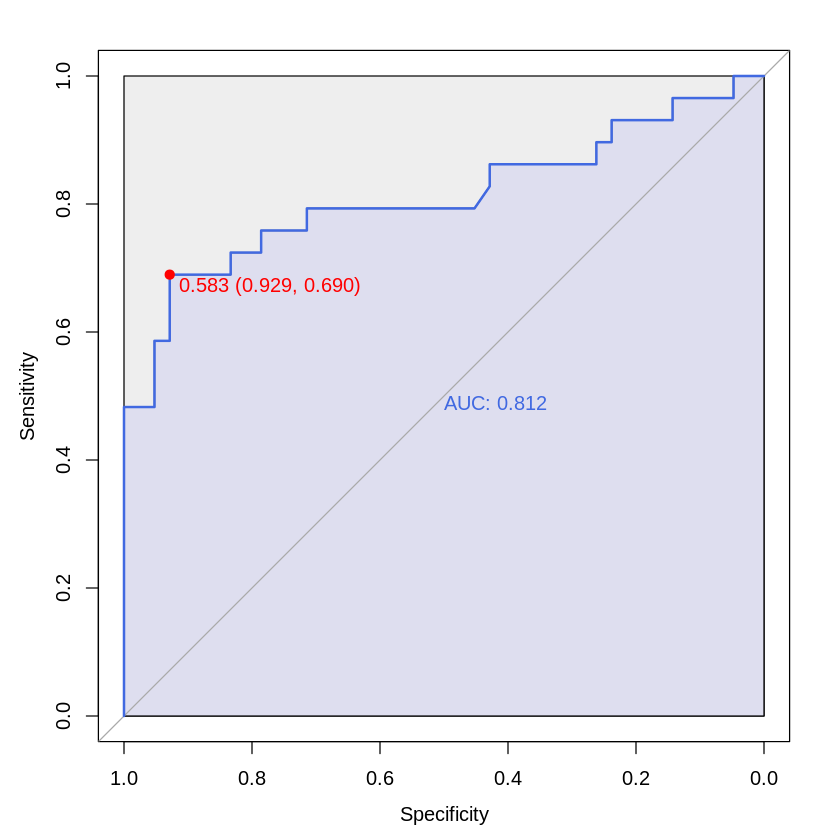

In [ ]:
# 이 내용은 그냥 pdf긁어옴
print("실제 정답과 lorm_bw_man 모델로 예측된 예측값으로 roc 곡선 생성")

roc_cutoff <- pROC::roc(real_predict$Survived, real_predict$predict_value)
pROC::plot.roc(
  roc_cutoff,
  col="royalblue",
  print.auc=TRUE,
  max.auc.polygon=TRUE,
  print.thres=TRUE, print.thres.pch=19, print.thres.col = "red",
  auc.polygon=TRUE, auc.polygon.col="#DEDEEF"
)

roc_cutoff_value <- pROC::coords(roc_cutoff, "best", ret = "threshold", transpose = F)[1,1]
roc_cutoff_value

### 13. ROC 곡선으로 구해진 roc_cutoff_value를 적용하여 real_predict에 predict_Survived_roccut를 설정하여 real_predict에 저장하세요. (Hint) mutate( as.factor( ifelse() ) )


In [ ]:
real_predict <-
  real_predict %>%
    mutate(predict_Survived_roccut =
      as.factor(
        ifelse(predict_value > 0.583, 1, 0)
      )
    )

real_predict %>% show()

# A tibble: 71 × 3
   Survived predict_value predict_Survived_roccut
   <fct>            <dbl> <fct>                  
 1 0               0.522  0                      
 2 1               0.882  1                      
 3 1               0.839  1                      
 4 1               0.0810 0                      
 5 0               0.107  0                      
 6 0               0.114  0                      
 7 0               0.564  0                      
 8 1               0.112  0                      
 9 0               0.321  0                      
10 0               0.648  1                      
# ℹ 61 more rows


### 14. 위 문제에서 구한 real_predict\$Survived와 real_predict\$predict_Survived_roccut 사이의 혼돈 매트릭스를 구해 정확도 및 성능지표를 확인하세요. (Hint) caret::confusionMatrix()

In [ ]:
caret::confusionMatrix(
  real_predict$Survived,
  real_predict$predict_Survived_roccut
)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 39  3
         1  9 20
                                          
               Accuracy : 0.831           
                 95% CI : (0.7234, 0.9095)
    No Information Rate : 0.6761          
    P-Value [Acc > NIR] : 0.002624        
                                          
                  Kappa : 0.6387          
                                          
 Mcnemar's Test P-Value : 0.148915        
                                          
            Sensitivity : 0.8125          
            Specificity : 0.8696          
         Pos Pred Value : 0.9286          
         Neg Pred Value : 0.6897          
             Prevalence : 0.6761          
         Detection Rate : 0.5493          
   Detection Prevalence : 0.5915          
      Balanced Accuracy : 0.8410          
                                          
       'Positive' Class : 0               
                                    

### 15. 다음의 데이터는 임의로 나이 성별 등 모델에 적용될 데이터를 설정한 데이터 프레임입니다. lorm_bw_titanic 모델과 roc_cutoff_value를 사용하여 이 데이터의 경우 생존인지 사망인지 예측해 보세요.

In [ ]:
 newd = data.frame(
  Survived=factor(c(NA, NA, NA, NA, NA, NA, NA, NA)),
  PassengerId=factor(c(54,34,23,61,63,234,21,5)),
  Pclass=factor(c("1", "1", "1", "1", "2", "2", "2", "2")),
  Sex= factor(c("female", "male", "female", "male", "female", "male", "female", "male")),
  Age=c(28, 28, 5, 5, 28, 28, 5, 5), SibSp=c(1, 1, 1, 1, 1, 1, 1, 1),
  Parch=c(0, 0, 0, 0, 0, 0, 0, 0), Fare=c(80, 80, 80, 80, 80, 80, 80, 80),
  Embarked=factor(c("S", "S", "S", "S", "S", "S", "S", "S"))
 )

In [ ]:
newd <-
  newd %>%
    mutate(predict_newd = predict(lorm_bw_titanic, newdata = newd, type = "response")
    )

newd <-
  newd %>%
    mutate(Survived =
      as.factor(
        ifelse(predict_newd > roc_cutoff_value, 1, 0)
      )
  )

newd

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict_newd
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,1,female,28,1,0,80,S,0.9407576
0,1,male,28,1,0,80,S,0.5219078
1,1,female,5,1,0,80,S,0.9778163
1,1,male,5,1,0,80,S,0.7518685
1,2,female,28,1,0,80,S,0.7967341
0,2,male,28,1,0,80,S,0.2122603
1,2,female,5,1,0,80,S,0.9158245
0,2,male,5,1,0,80,S,0.4278964


In [ ]:
newd$predict_newd <-
  predict(lorm_bw_titanic, newd, type = "response")

newd$Survived = as.factor(ifelse(newd$predict_newd > roc_cutoff_value, 1, 0))
newd

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict_newd
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,1,female,28,1,0,80,S,0.9407576
0,1,male,28,1,0,80,S,0.5219078
1,1,female,5,1,0,80,S,0.9778163
1,1,male,5,1,0,80,S,0.7518685
1,2,female,28,1,0,80,S,0.7967341
0,2,male,28,1,0,80,S,0.2122603
1,2,female,5,1,0,80,S,0.9158245
0,2,male,5,1,0,80,S,0.4278964
